# Top merma por producto

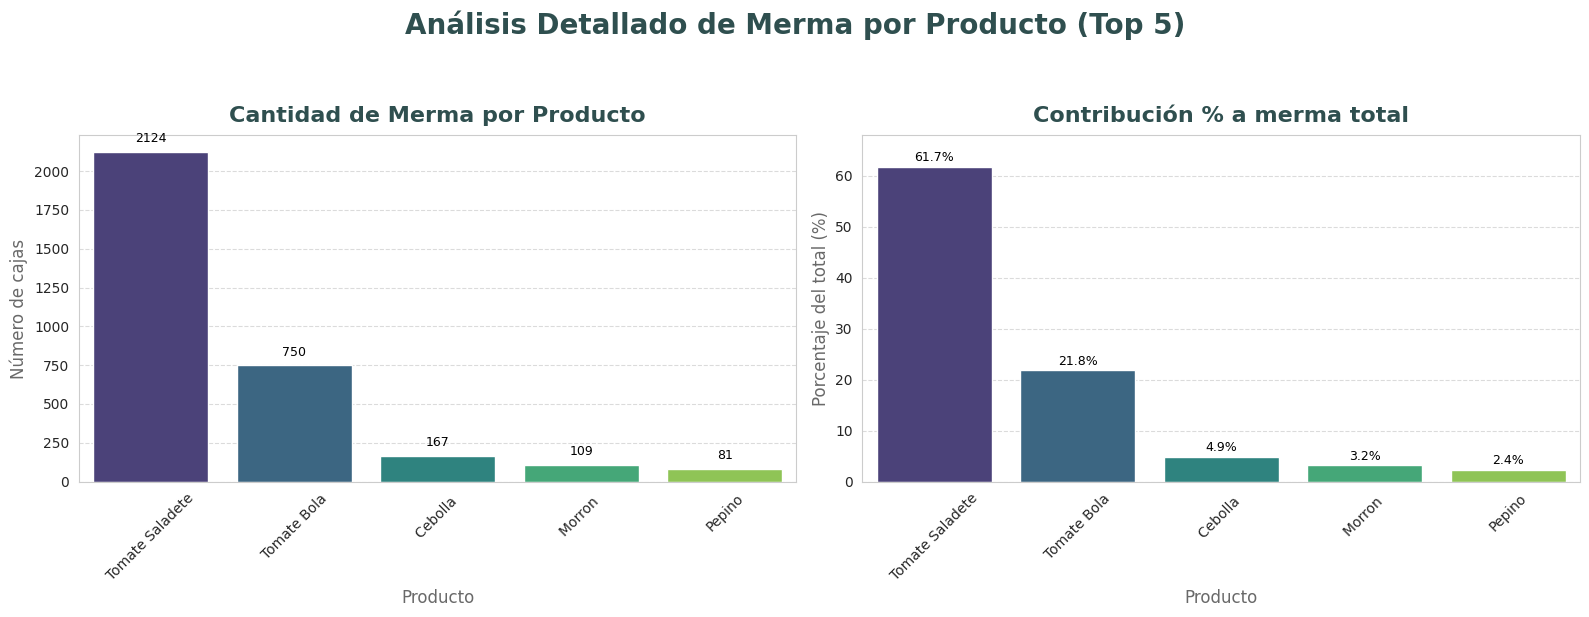

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumo que ya tienes tu DataFrame cargado así:
df = pd.read_csv('./og_exogenas.csv', parse_dates=['Fecha'], index_col='Fecha')

# 1. Contar la frecuencia de cada producto en la columna 'Producto'
product_counts = df['Producto'].value_counts()

# 2. Seleccionar los 5 productos más repetidos
top_5_products = product_counts.head(5)

# 3. Calcular el total de ocurrencias de *todos* los productos
total_merma_occurrences = product_counts.sum()

# 4. Calcular el porcentaje de cada uno de los top 5 productos respecto al total general
percentage_per_top_5_product = (top_5_products / total_merma_occurrences) * 100

# --- Configuración general para las gráficas ---
sns.set_style("whitegrid")

# Importante: Unificar la paleta de colores para ambos gráficos
unified_colors = sns.color_palette("viridis", len(top_5_products))
product_color_map = {product: unified_colors[i] for i, product in enumerate(top_5_products.index)}

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) # Tamaño más compacto y ancho

# --- Gráfico Izquierdo: Cantidad de Ocurrencias ---
ax1 = axes[0]
bars1 = sns.barplot(x=top_5_products.index, y=top_5_products.values,
                    palette=[product_color_map[p] for p in top_5_products.index],
                    hue=top_5_products.index, # Añadir hue para evitar el FutureWarning
                    legend=False, # No necesitamos una leyenda si los colores son por el eje X
                    ax=ax1)

ax1.set_title('Cantidad de Merma por Producto',
              fontsize=16, fontweight='bold', color='darkslategray', pad=10)
ax1.set_ylabel('Número de cajas', fontsize=12, color='dimgray')
ax1.set_xlabel('Producto', fontsize=12, color='dimgray')
ax1.tick_params(axis='y', labelsize=10)
# Corrección aquí: Usar 'labelrotation' en lugar de 'rotation' y quitar 'ha'
ax1.tick_params(axis='x', labelrotation=45, labelsize=10) # CORREGIDO

# Añadir el número exacto de repeticiones encima de cada barra
for bar in bars1.patches:
    ax1.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + (top_5_products.max() * 0.02),
             f'{int(bar.get_height())}',
             ha='center', va='bottom',
             color='black', fontsize=9)

ax1.grid(axis='y', linestyle='--', alpha=0.7)


# --- Gráfico Derecho: Porcentaje de Contribución a la Merma Total ---
ax2 = axes[1]
bars2 = sns.barplot(x=percentage_per_top_5_product.index,
                    y=percentage_per_top_5_product.values,
                    palette=[product_color_map[p] for p in percentage_per_top_5_product.index],
                    hue=percentage_per_top_5_product.index, # Añadir hue para evitar el FutureWarning
                    legend=False, # No necesitamos una leyenda
                    ax=ax2)

ax2.set_title('Contribución % a merma total',
              fontsize=16, fontweight='bold', color='darkslategray', pad=10)
ax2.set_xlabel('Producto', fontsize=12, color='dimgray')
ax2.set_ylabel('Porcentaje del total (%)', fontsize=12, color='dimgray')
# Corrección aquí: Usar 'labelrotation' en lugar de 'rotation' y quitar 'ha'
ax2.tick_params(axis='x', labelrotation=45, labelsize=10) # CORREGIDO
ax2.tick_params(axis='y', labelsize=10)

# Añadir el porcentaje exacto encima de cada barra
for bar in bars2.patches:
    ax2.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%',
             ha='center', va='bottom',
             color='black', fontsize=9)

ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_ylim(0, percentage_per_top_5_product.max() * 1.1)

# Título general para toda la figura
plt.suptitle('Análisis Detallado de Merma por Producto (Top 5)',
             fontsize=20, fontweight='bold', color='darkslategray', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()